# Setting the box size (`Lbox`) and initial grid size (`levelmin`)

Let the scale factor and redhisft be denoted by $a$ and $z$, respectively.
- scale factor: $a$  
- redshift: $z = \frac{1}{a} - 1$  

The global refinement times are fixed at
$a_\text{ref} = 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4$ and $0.8$.

Set the starting scale factor to be $a_\text{start}$, with the condition that $a_\text{start} < a_\text{ref, min} = 0.0125$.  
The corresponding redshift is then given by $z_\text{start} = \frac{1}{a_\text{start}} - 1$.  

The side length of the simulation box is denoted by $L_\text{box}$, where subscripts $p$ and $c$ represent the proper and comoving scales, respectively.  
$L_{\text{box}, p} = a \times L_{\text{box}, c}$  

The side length of a cell is defined as $dx$, which is determined by the box size and the initial number of cells.  
$dx_{c, \text{ini}} = \frac{L_{\text{box}, c}}{N_\text{cell, ini}}$  

When a cell undergoes refinement, its size decreases by a factor of $2^{N_\text{ref}(a)}$.  
The function $N_\text{ref}(a)$ represents the number of refinements a cell has experienced at a given $a$.  
The number of refinements is defined as follows.  
If $0 \leq a \lt 0.0125$ then $N_{ref}(a) = 0$.  
If $0.0125 \leq a \lt 0.025$ then $N_{ref}(a) = 1$.  
If $0.025 \leq a \lt 0.05$ then $N_{ref}(a) = 2$.  
If $0.05 \leq a \lt 0.1$ then $N_{ref}(a) = 3$.  
If $0.1 \leq a \lt 0.2$ then $N_{ref}(a) = 4$.  
If $0.2 \leq a \lt 0.4$ then $N_{ref}(a) = 5$.  
If $0.4 \leq a \lt 0.8$ then $N_{ref}(a) = 6$.  
If $0.8 \leq a$ then $N_{ref}(a) = 7$.  

Thus, the minimum cell size (i.e., resolution) can be expressed as follows.  
$dx_c(a) = \frac{L_{\text{box}, c}}{N_\text{ini, cell}} \times \frac{1}{2^{N_\text{ref}(a)}}$  
$dx_p(a) = a \times \frac{L_{\text{box}, c}}{N_\text{ini, cell}} \times \frac{1}{2^{N_\text{ref}(a)}}$  



We want to achieve a proper resolution of $1 kpc$ at $z=0$ (i.e, $a=1$), hence:  
$dx_p(a=1) = \frac{L_{\text{box}, c}}{N_\text{ini, cell}} \times \frac{1}{2^7} = 1 kpc$.  

From this, we can derive:  
$L_{\text{box},c} = N_\text{ini, cell} \times 2^7 ckpc$.  

Put $N_\text{ini, cell} = 2^\text{levelmin}$. Then,  
$L_{\text{box},c} = 2^{\text{levelmin} + 7} kpc = \frac{2^{\text{levelmin} + 7}}{1000} Mpc$.  

# HR5 Simulation
In case of the HR5 simulation, $levelmin = 13$, corresponding that their box size is $2^{20} kpc$ ($\approx 1 Gpc$).


From the HR5 papaer:
> The initial density field in a periodic box of 1049 cMpc size is generated on a 2563 grid where each cell size is 4.09 cMpc, while that for the high-resolution zoom region of 1049 × 119 × 127 cMpc3 is filled with 8192 × 930 × 994 cells with a side length of 128 ckpc. Inside the zoom region, 128 ckpc sized cells at level = 13 are gradually refined up to 1 kpc at level = 20 at z = 0. Note that the HR5 simulation stops at z = 0.625, and thus the final resolution inside the zoom region is stopped at 2 ckpc. To avoid low-resolution particles from outside the region of interest contaminating the high-resolution region, four intermediate buffer regions of level = 9–12 surround the zoom region (see Figure 1).


# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter settings

In [2]:
# Set 2 input parameters (z0, levelmin)
# Then, Lbox will be determined.

# Starting redshift and scale factor
z0 = 200
a0 = 1/(z0 + 1)

# Testing scale factor and redshift arrays
a = np.linspace(a0, 1, 100)
z = 1/a - 1

# Global refinemnent times
a_refine = np.array([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8])
z_refine = 1/a_refine - 1
n_refine = np.digitize(a, bins=a_refine) # the number of refinements

# Sevel settins
levelmin = 10
levelmax = levelmin + len(a_refine)
# If a_start < a_refine.min(), just add len(a_refine).
# If a_start > a_refine.min(), the code has to be modified.

# Box size calculation
n_cell0 = 2**levelmin # initial number of cell
c_Lbox  = 2**levelmax # [ckpc] comoving box size
c_Lbox /= 1000        # [cMpc] comoving box size
p_Lbox  = a * c_Lbox  # [pMpc] proper   box size

# Cell size calculation (Resolution)
c_dx0 = c_Lbox / n_cell0   # [cMpc] comoving initial cell size
p_dx0 = a0 * c_dx0         # [pMpc] proper   initial cell size
c_dx = c_dx0 / 2**n_refine # [cMpc] comoving cell size
p_dx = a * c_dx            # [pMpc] proper   cell size

In [3]:
# Print the parameters
print(f"Starting redshift (z0): {z0}")
print(f"Starting scale factor (a0): 1/{z0} = {a0}")
print(f"Global refinement times:")
for a_r, z_r in zip(a_refine, z_refine):
    print(f"  a = {a_r:10.4f}, z = {z_r:10.4f}")
print(f"Minimum level (levelmin): {levelmin}")
print(f"Maximum level (levelmax): {levelmax}")
print(f"Initial number of cells (n_cell0): 2^(levelmin) = {n_cell0}")
print(f"Initial comoving cell size (c_dx0) in ckpc: {c_dx0*1000:10.4f}")
print(f"Initial proper   cell size (p_dx0) in pkpc: {p_dx0*1000:10.4f}")
print(f"Comoving box size (c_Lbox) in cMpc: {c_Lbox:10.4f}")

Starting redshift (z0): 200
Starting scale factor (a0): 1/200 = 0.004975124378109453
Global refinement times:
  a =     0.0125, z =    79.0000
  a =     0.0250, z =    39.0000
  a =     0.0500, z =    19.0000
  a =     0.1000, z =     9.0000
  a =     0.2000, z =     4.0000
  a =     0.4000, z =     1.5000
  a =     0.8000, z =     0.2500
Minimum level (levelmin): 10
Maximum level (levelmax): 17
Initial number of cells (n_cell0): 2^(levelmin) = 1024
Initial comoving cell size (c_dx0) in ckpc:   128.0000
Initial proper   cell size (p_dx0) in pkpc:     0.6368
Comoving box size (c_Lbox) in cMpc:   131.0720


<IPython.core.display.Javascript object>


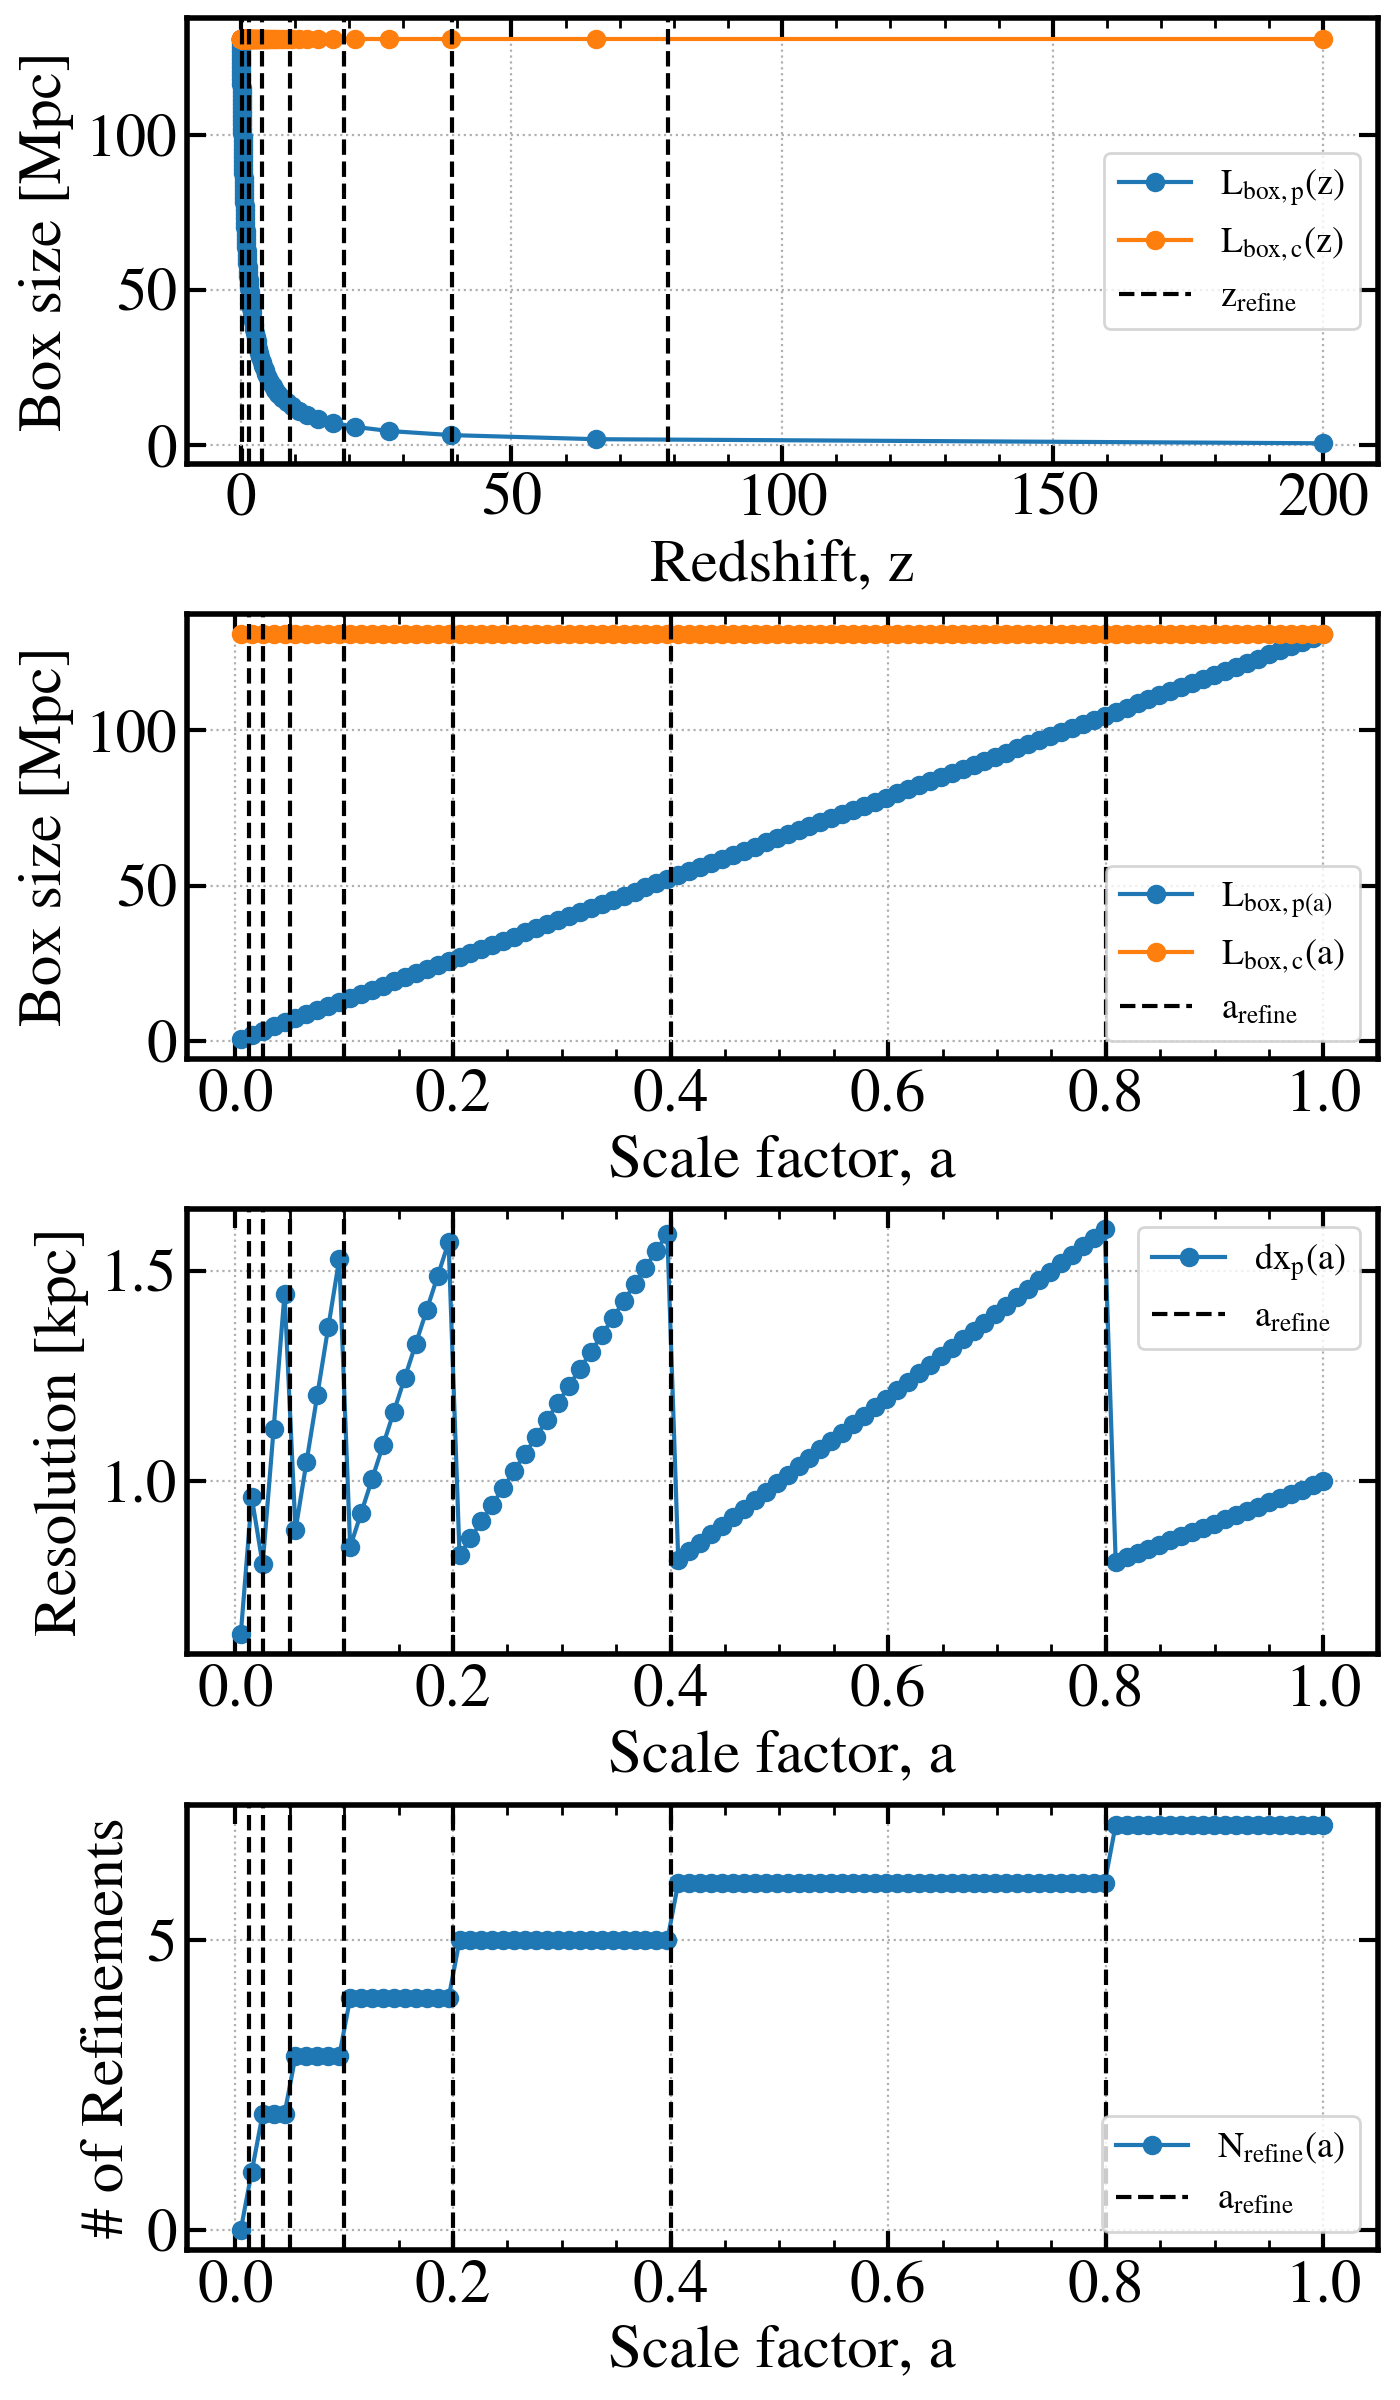

In [4]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(7, 12))

ax[0].plot(z, p_Lbox, 'o-', label=r"$\rm L_{box,p}(z)$")
ax[0].plot(z, [c_Lbox]*len(a), 'o-', label=r"$\rm L_{box,c}(z)$")
for i in range(len(z_refine)): ax[0].axvline(z_refine[i], ls="--", c='k')
ax[0].plot(np.nan, np.nan, ls="--", c='k', label=r"$\rm z_{refine}$")
ax[0].set_xlabel("Redshift, z")
ax[0].set_ylabel(r"Box size [Mpc]")
ax[0].legend(fontsize=13)
ax[0].grid(ls=":")


ax[1].plot(a, p_Lbox, 'o-', label=r"$\rm L_{box,p(a)}$")
ax[1].plot(a, [c_Lbox]*len(a), 'o-', label=r"$\rm L_{box,c}(a)$")
for i in range(len(a_refine)): ax[1].axvline(a_refine[i], ls="--", c='k')
ax[1].plot(np.nan, np.nan, ls="--", c='k', label=r"$\rm a_{refine}$")
ax[1].set_xlabel("Scale factor, a")
ax[1].set_ylabel(r"Box size [Mpc]")
ax[1].legend(fontsize=13)
ax[1].grid(ls=":")


ax[2].plot(a, p_dx*1000, 'o-', label=r"$\rm dx_{p}(a)$")
for i in range(len(a_refine)): ax[2].axvline(a_refine[i], ls="--", c='k')
ax[2].plot(np.nan, np.nan, ls="--", c='k', label=r"$\rm a_{refine}$")
ax[2].set_xlabel("Scale factor, a")
ax[2].set_ylabel(r"Resolution [kpc]")
ax[2].legend(fontsize=13)
ax[2].grid(ls=":")


ax[3].plot(a, n_refine, 'o-', label=r"$\rm N_{refine}(a)$")
for i in range(len(a_refine)): ax[3].axvline(a_refine[i], ls="--", c='k')
ax[3].plot(np.nan, np.nan, ls="--", c='k', label=r"$\rm a_{refine}$")
ax[3].set_xlabel("Scale factor, a")
ax[3].set_ylabel("# of Refinements")
ax[3].legend(fontsize=13)
ax[3].grid(ls=":")

plt.tight_layout(pad=0.3)